# Um exeplo introdutório

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
p = np.array([[0.4046, 0.9974, 0.3764, 0.6043],
             [0.3786, 0.8479, 0.9214, 0.3494],
             [0.7010, 0.6201, 0.9331, 0.1438],
             [0.8608, 0.4031, 0.7514, 0.6035],
             [0.5947, 0.9653, 0.6914, 0.4111]])
t = np.array( [0,1,0,1,1] )

 

In [3]:
import keras
import tensorflow as tf
from keras import models
from keras import layers
from keras.optimizers import SGD


Using TensorFlow backend.


In [5]:
model = models.Sequential()
model.add(layers.Dense(3,input_shape=(4,), kernel_initializer='normal', activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [6]:
history = model.fit(p,t, epochs=100000, verbose=0)

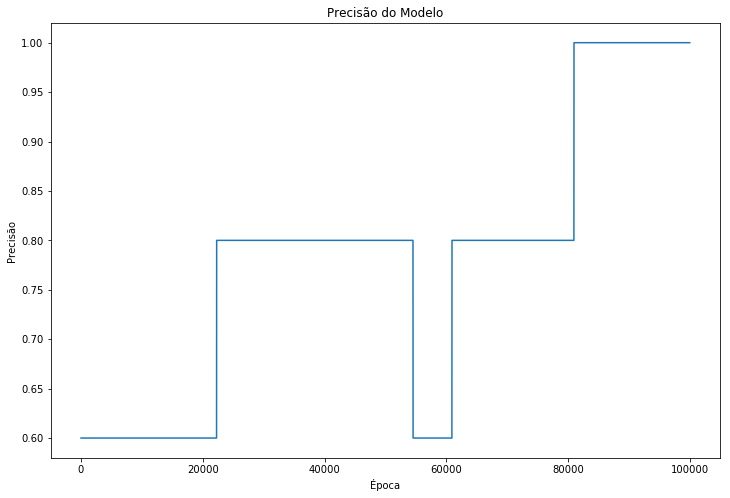

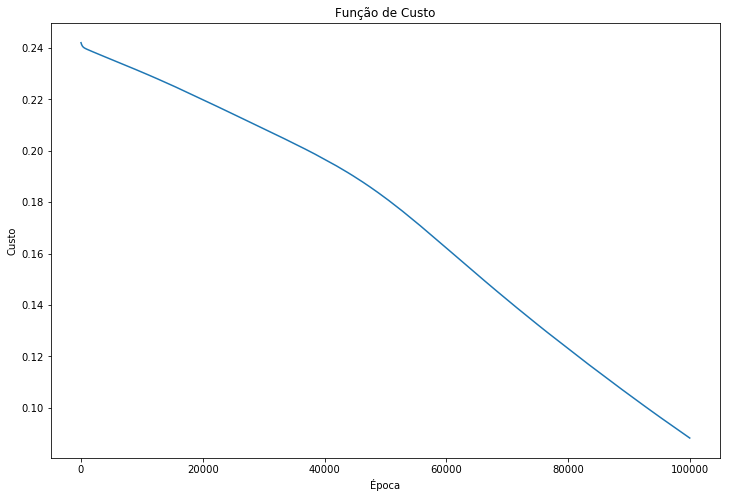

In [7]:
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.title('Precisão do Modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.show()


plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('Função de Custo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.show()

# Modelo de predição de crédito

In [9]:
#colunas = ['ESCT','NDEP','RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

In [10]:
datafile = 'data/credtrain.txt'
cols = np.genfromtxt(datafile, dtype=None, delimiter='', autostrip=True)

print(cols.dtype.names,"\n",cols)

None 
 [[   1    0  360 ...,   48    0    1]
 [   0    0  350 ...,    6    0    1]
 [   0    0 1100 ...,   48    0    1]
 ..., 
 [   0    0  570 ...,  144    0    1]
 [   0    0  360 ...,   36    0    1]
 [   0    4  501 ...,    6    0    0]]


In [11]:
P =  cols[:,:-1]
print(P)
print(P.shape)

[[   1    0  360 ...,   25   48    0]
 [   0    0  350 ...,   33    6    0]
 [   0    0 1100 ...,   56   48    0]
 ..., 
 [   0    0  570 ...,   28  144    0]
 [   0    0  360 ...,   33   36    0]
 [   0    4  501 ...,   37    6    0]]
(1500, 11)


In [12]:
t = cols[:,-1]
print(t)

[1 1 1 ..., 1 1 0]


In [14]:
model = models.Sequential()
model.add(layers.Dense(3,input_shape=(11,), kernel_initializer='normal', activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
history = model.fit(P,t, epochs=100, verbose=0)

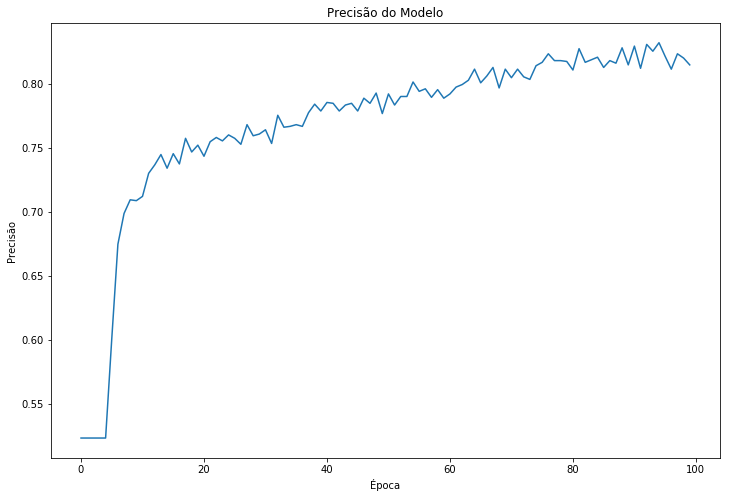

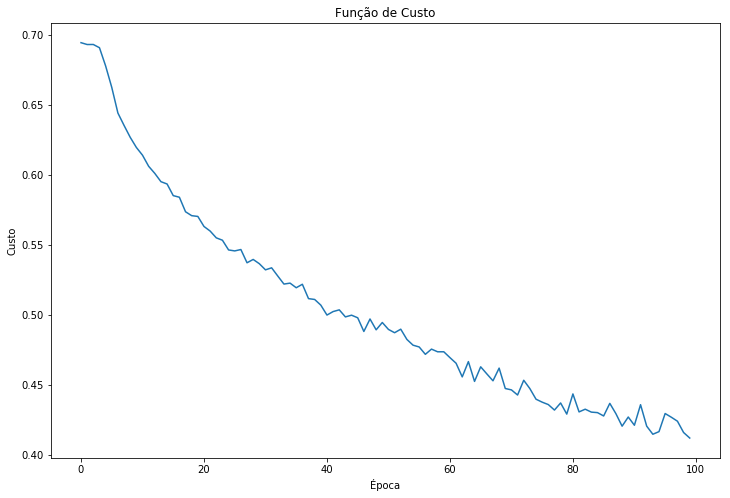

In [16]:
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.title('Precisão do Modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('Função de Custo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.show()

In [17]:
datafile = 'data/credtest.txt'
testData = np.genfromtxt(datafile, dtype=None, delimiter='', autostrip=True)
PTest =  testData[:,:-1]
tTest = testData[:,-1]


In [18]:
evl = model.evaluate(PTest, tTest,verbose=0)
print(model.metrics_names[0],evl[0])
print(model.metrics_names[1],evl[1])

loss 0.411133350491
acc 0.826689774697


In [19]:
predictions = model.predict_classes(PTest,batch_size=10)

 10/577 [..............................] - ETA: 0s

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(tTest,predictions)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[262  44]
 [ 56 215]]


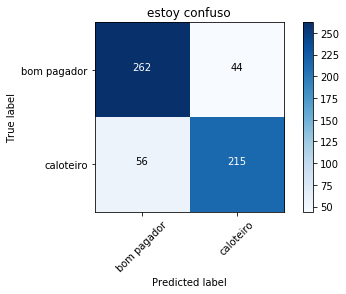

In [24]:
cm_plot_labels=['bom pagador','caloteiro']
plot_confusion_matrix(cm,cm_plot_labels,title="estoy confuso")
plt.show()

# CatClassifier

In [25]:
import h5py as h5

train_dataset = h5.File('data/train_catvnoncat.h5')
list(train_dataset.keys())


train_dataset = h5.File('data/train_catvnoncat.h5')
train_set_x_orig=np.array(train_dataset['train_set_x'][:])
train_set_y_orig=np.array(train_dataset['train_set_y'][:])
test_dataset = h5.File('data/test_catvnoncat.h5','r')
test_set_x_orig=np.array(test_dataset['test_set_x'][:])
test_set_y_orig=np.array(test_dataset['test_set_y'][:])
classes=np.array(test_dataset['list_classes'][:])
train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))



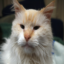

In [26]:
from PIL import Image
Image.fromarray(train_dataset['train_set_x'][27])

In [27]:
from keras import layers, models, optimizers


###### FFN normal

In [28]:
print(train_set_x_orig.shape)

(209, 64, 64, 3)


In [94]:
dim = 12288
train_data_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], dim)

test_data_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], dim)


In [95]:
train_data_x = np.array(train_data_x) /255.0
test_data_x = np.array(test_data_x) /255.0
print(train_data_x.shape)

(209, 12288)


In [96]:
from keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_set_y_orig)
test_labels_one_hot = to_categorical(test_set_y_orig)


In [113]:
model = models.Sequential()
model.add(layers.Dense(512,input_shape=(12288,), activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

## sigmoide deu vanishing gradient, mudei para relu

## Muitos neurônios, o espaço de minimização é amplo. SGD é o mais rápido: https://arxiv.org/abs/1406.2572 
## estamos usando todos os espaço de cores RGB, a esperança é que a rede identifique relações entre cores que formam um gato.

In [114]:
history = model.fit(train_data_x, train_labels_one_hot, epochs=70, verbose=1)

Epoch 1/70
209/209 [==============================] - 1s - loss: 0.2395 - acc: 0.6459     
Epoch 2/70
209/209 [==============================] - 0s - loss: 0.2188 - acc: 0.6555     
Epoch 3/70
209/209 [==============================] - 0s - loss: 0.2165 - acc: 0.6316     
Epoch 4/70
209/209 [==============================] - 0s - loss: 0.2040 - acc: 0.6986     
Epoch 5/70
209/209 [==============================] - 0s - loss: 0.1940 - acc: 0.7321     
Epoch 6/70
209/209 [==============================] - 0s - loss: 0.2012 - acc: 0.6890     
Epoch 7/70
209/209 [==============================] - 0s - loss: 0.2010 - acc: 0.6890     
Epoch 8/70
209/209 [==============================] - 0s - loss: 0.1766 - acc: 0.7416     
Epoch 9/70
209/209 [==============================] - 0s - loss: 0.1858 - acc: 0.7177     
Epoch 10/70
209/209 [==============================] - 0s - loss: 0.1691 - acc: 0.7943     
Epoch 11/70
209/209 [==============================] - 0s - loss: 0.1694 - acc: 0.7512   

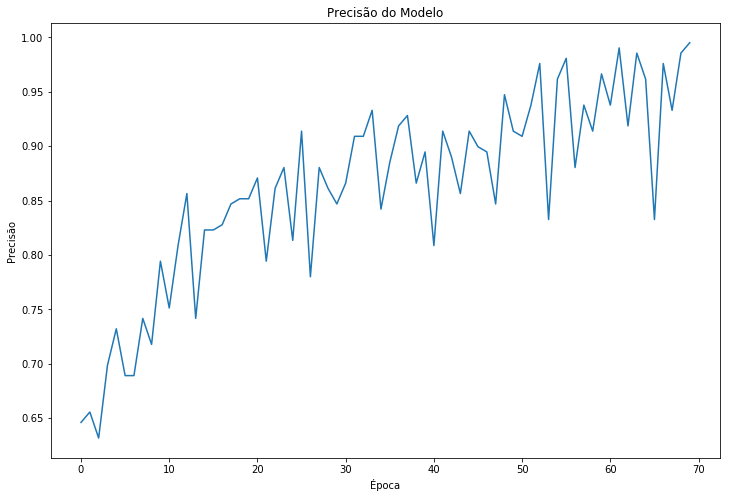

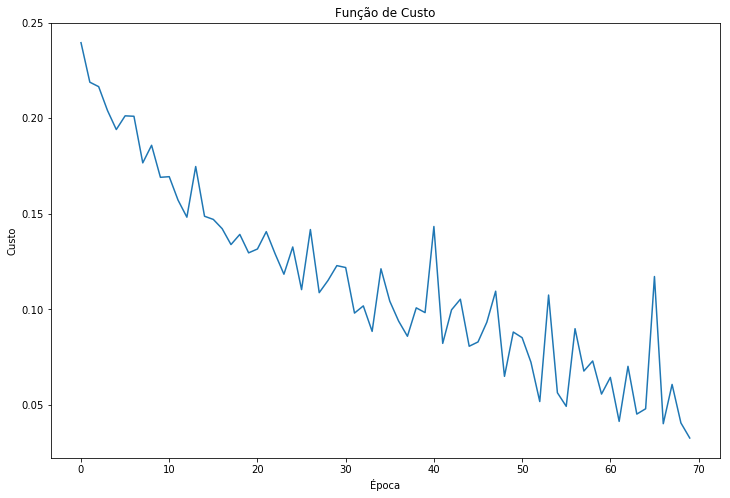

In [115]:
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.title('Precisão do Modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('Função de Custo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.show()


In [116]:
# Esses pulos são um comportamento esperado do sgd em uma architetura tão grande? (saddle points?)


evl = model.evaluate(test_data_x, test_labels_one_hot,verbose=0)
print(model.metrics_names[0],evl[0])
print(model.metrics_names[1],evl[1])

# Algo para melhorar isto seria aplicar algum filtro nas imagens, tal como detector de arestas, ou tranferí-las para escala de cinza;


loss 0.16655433774
acc 0.760000004768


###### CNN

In [161]:
model = models.Sequential()

model.add(layers.Convolution2D(
    batch_input_shape=(None, 64, 64, 3),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',
    data_format='channels_first',
))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',
    data_format='channels_first',
))

In [162]:
model.add(layers.Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(layers.Convolution2D(128, 5, strides=1, padding='same', data_format='channels_first'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(layers.Convolution2D(256, 5, strides=1, padding='same', data_format='channels_first'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(layers.Convolution2D(512, 5, strides=1, padding='same', data_format='channels_first'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2, 'same', data_format='channels_first'))

In [163]:
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

## sim ou não
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

adam = optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
## tive que abaixar o lr do adam pois não estava minimizando

In [164]:

history = model.fit(train_dataset['train_set_x'], train_dataset['train_set_y'], epochs=25, batch_size=64, shuffle='batch',verbose=1)


Epoch 1/25
209/209 [==============================] - 5s - loss: 0.7321 - acc: 0.6077     
Epoch 2/25
209/209 [==============================] - 4s - loss: 0.6757 - acc: 0.6220     
Epoch 3/25
209/209 [==============================] - 5s - loss: 0.6129 - acc: 0.6459     
Epoch 4/25
209/209 [==============================] - 4s - loss: 0.5928 - acc: 0.6794     
Epoch 5/25
209/209 [==============================] - 4s - loss: 0.5909 - acc: 0.6842     
Epoch 6/25
209/209 [==============================] - 4s - loss: 0.5471 - acc: 0.7177     
Epoch 7/25
209/209 [==============================] - 3s - loss: 0.5021 - acc: 0.7416     
Epoch 8/25
209/209 [==============================] - 3s - loss: 0.4447 - acc: 0.7799     
Epoch 9/25
209/209 [==============================] - 4s - loss: 0.4075 - acc: 0.8086     
Epoch 10/25
209/209 [==============================] - 4s - loss: 0.3602 - acc: 0.8469     
Epoch 11/25
209/209 [==============================] - 3s - loss: 0.3258 - acc: 0.8660   

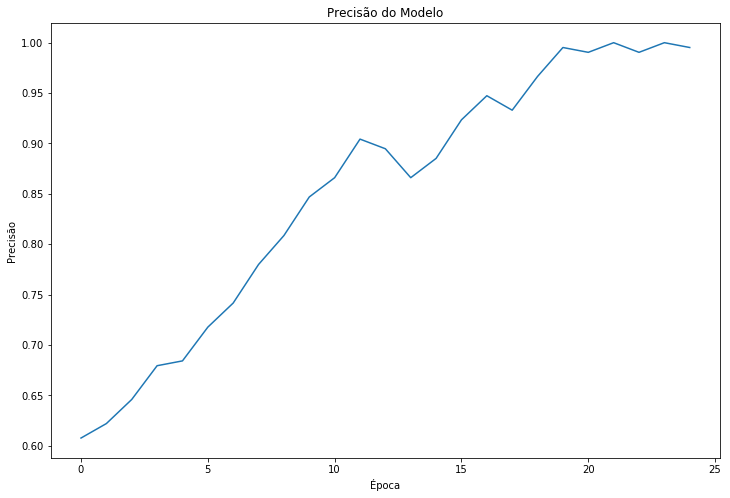

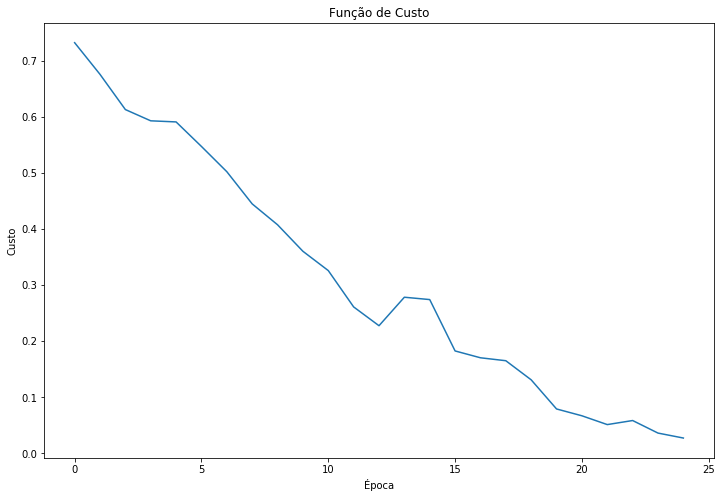

In [165]:
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.title('Precisão do Modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('Função de Custo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.show()

In [166]:
evl = model.evaluate(test_dataset['test_set_x'], test_dataset['test_set_y'],verbose=0)
print(model.metrics_names[0],evl[0])
print(model.metrics_names[1],evl[1])
## 

loss 0.604528770447
acc 0.860000002384


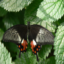

In [167]:
Image.fromarray(test_dataset['test_set_x'][27]) # não gato


In [168]:
img = Image.fromarray(test_dataset['test_set_x'][27])
x = np.expand_dims(img, axis=0)
print(model.predict_classes(x))

1/1 [==============================] - 0s
[[0]]


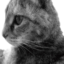

In [169]:
Image.fromarray(test_dataset['test_set_x'][23]) # gato

In [170]:
img = Image.fromarray(test_dataset['test_set_x'][23])
x = np.expand_dims(img, axis=0)
print(model.predict_classes(x))

1/1 [==============================] - 0s
[[1]]
